In [1]:
import random, os, re, json, sys
sys.path.append("../scripts/")
from helper import *
import numpy as np
from tqdm import tqdm
from collections import Counter, defaultdict
from matplotlib import pyplot as plt


### Data Generation

In [7]:
repeat = 1
J = []
input_lengths = list(range(129, 257))

dir = "../data/feed_decoder_LM/regular/max"
with open(f"{dir}/try1.txt", "w") as f:
    for input_len in input_lengths:
        inputs = []
        for m in range(2, 11):
            for n in range(repeat):
                seq = [random.choice(list(range(m))) for i in range(input_len)]
                l = "".join([str(d) for d in seq])
                inputs.append(l)
                f.write(l + f", {max(seq)}\n")
        if Counter(inputs).most_common(1)[0][1] > 1:
            print(Counter(inputs).most_common(3))

In [5]:
repeat = 1
input_lengths = list(range(129, 257))
dir = "../data/feed_decoder_LM/regular/len"
with open(f"{dir}/try1.txt", "w") as f:  
    for input_len in input_lengths:
        inputs = []
        for n in range(repeat):
            seq = [random.choice(list(range(10))) for i in range(input_len)]
            l = "".join([str(d) for d in seq])
            inputs.append(l)
            f.write(l + f", {input_len}\n")
        if Counter(inputs).most_common(1)[0][1] > 1:
            print(Counter(inputs).most_common(3))

In [56]:
repeat = 1
input_lengths = list(range(16, 257))
dir = "../data/feed_decoder_LM/regular/copy"
with open(f"{dir}/try.txt", "w") as f:  
    for input_len in input_lengths:
        inputs = []
        for n in range(repeat):
            seq = [random.choice(list(range(10))) for i in range(input_len)]
            l = "".join([str(d) for d in seq])
            inputs.append(l)
            f.write(l + f", {l}\n")
        if Counter(inputs).most_common(1)[0][1] > 1:
            print(Counter(inputs).most_common(3))

In [37]:
repeat = 10
input_lengths = list(range(16, 129))
with open("../data/feed_decoder_LM/regular/sum/try.txt", "w") as f:
    for input_len in input_lengths:
        for n in range(repeat):
            seq = [random.choice(list(range(10))) for i in range(input_len)]
            l = "".join([str(d) for d in seq])
            f.write(l + f", {sum(seq)}\n")

In [64]:
repeat = 10
input_lengths = list(range(16, 129))
gths = []
with open("../data/feed_decoder_LM/regular/summod10/try.txt", "w") as f:
    for input_len in input_lengths:
        for n in range(repeat):
            seq = [random.choice(list(range(10))) for i in range(input_len)]
            l = "".join([str(d) for d in seq])
            gth = sum(seq)%10
            gths.append(gth)
            f.write(l + f", {gth}\n")
Counter(gths)

Counter({6: 105,
         1: 100,
         0: 120,
         8: 108,
         3: 139,
         4: 112,
         9: 114,
         2: 113,
         7: 111,
         5: 108})

In [2]:
repeat = 100
input_lengths = list(range(16, 129))
with open("../data/feed_decoder_LM/regular/reverse/try.txt", "w") as f:
    for input_len in input_lengths:
        for n in range(repeat):
            seq = [random.choice(list(range(10))) for i in range(input_len)]
            l = "".join([str(d) for d in seq])
            f.write(l + f", {l[::-1]}\n")

In [12]:
repeat = 10
input_lengths = list(range(16, 129))
dir = "../data/feed_decoder_LM/regular/add"
with open(f"{dir}/try.txt", "w") as f:  
    for input_len in input_lengths:
        gths = []
        for n in range(repeat):
            seq1 = [random.choice(list(range(1, 10)))] + [random.choice(list(range(10))) for i in range(input_len-1)]
            l1 = int("".join([str(d) for d in seq1]))
            seq2 = [random.choice(list(range(1, 10)))] + [random.choice(list(range(10))) for i in range(input_len-1)]
            l2 = int("".join([str(d) for d in seq2]))
            gths.append(l1 + l2)
            f.write(f"{l1} + {l2}, {l1+l2}\n")
        if Counter(gths).most_common(1)[0][1] > 1:
            print(Counter(gths).most_common(3))

In [73]:
repeat = 8
input_lengths = list(range(16, 129))
dir = "../data/feed_decoder_LM/regular/mult"
with open(f"{dir}/try2.txt", "w") as f:  
    for input_len in input_lengths:
        gths = []
        for n in range(repeat):
            seq = [random.choice(list(range(1, 10)))] + [random.choice(list(range(10))) for i in range(input_len-1)]
            l = int("".join([str(d) for d in seq]))
            gths.append(l * (n+2))
            f.write(f"{l} * {n+2}, {l * (n+2)}\n")
        if Counter(gths).most_common(1)[0][1] > 1:
            print(Counter(gths).most_common(3))

In [49]:
repeat = 10
input_lengths = list(range(16, 129))
gths = []
with open("../data/feed_decoder_LM/regular/sort/try.txt", "w") as f:
    for input_len in input_lengths:
        for n in range(repeat):
            digits = "1234567890" + "".join([random.choice("1234567890") for i in range(input_len-10)])
            gth = "".join(sorted(digits))
            gths.append(gth)
            seq = np.random.permutation(sorted(digits))
            l = "".join([d for d in seq])
            f.write(l + f", {gth}\n")
Counter(gths).most_common(3)

[('0011233344566789', 1), ('0011222334556789', 1), ('0012233334456789', 1)]

### Evaluation

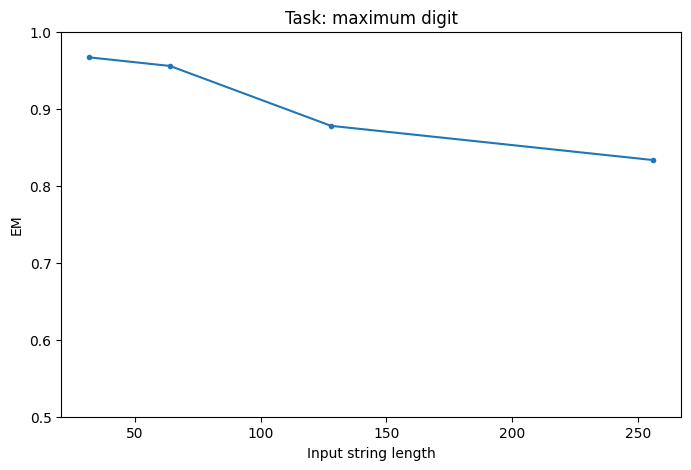

In [80]:
dir = "../data/output_decoder_LM/chatgpt/regular/max/"
input_len_to_em = defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = int(re.findall(r'([0-9]+)', output)[0])
            input_len_to_em[len(input)].append(int(gth) == int(output))

plt.figure(figsize=(8, 5))
plt.plot(list(input_len_to_em.keys()), [np.mean(v) for v in input_len_to_em.values()], ".-")
plt.ylim((0.5, 1.0))
plt.ylabel("EM")
plt.title("Task: maximum digit")
plt.xlabel("Input string length")
plt.show()

In [82]:
dir = "../data/output_decoder_LM/chatgpt/regular/len/"
input_len_to_em, input_len_to_error_mag = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            try: output = int(output)
            except ValueError:
                try: output = int(re.findall(r'([0-9]+)\.', output)[0])
                except ValueError: output = int(re.findall(r'is ([0-9]+)', output)[0])
            input_len_to_em[len(input)].append(int(gth) == int(output))
            input_len_to_error_mag[len(input)].append(np.abs(int(gth) - output))


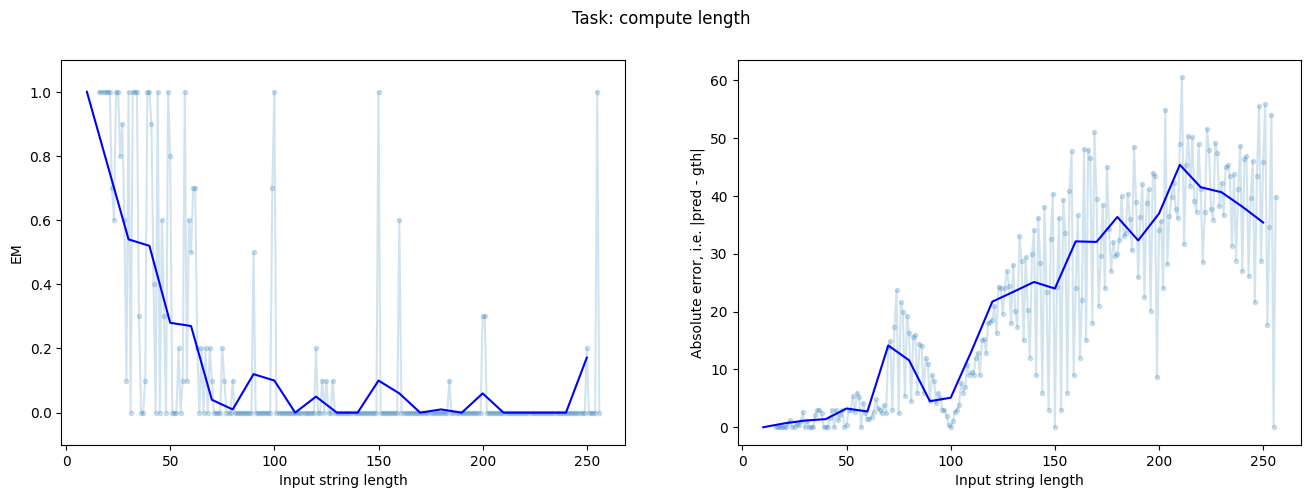

In [87]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_em.keys())
Y1 = [float(np.mean(input_len_to_em[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 26)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_em[k]) for k in input_len_to_em if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 26)
]
ax1.plot(X1, Y1, "-", color='b')
ax1.set_ylim((-0.1, 1.1))
ax1.set_ylabel("EM")
ax1.set_xlabel("Input string length")
#ax1.stairs(Y1, X1 + [130], fill=True, color='lightskyblue')
#ax1.vlines(X1, 0, max(Y1), colors='w')

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_error_mag.keys())
Y2 = [float(np.mean(input_len_to_error_mag[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 26)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_error_mag[k]) for k in input_len_to_error_mag if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 26)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("Absolute error, i.e. |pred - gth|")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: compute length")
plt.show()

In [89]:
dir = "../data/output_decoder_LM/chatgpt/regular/summod10/"
input_len_to_em, input_len_to_acc = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = int(re.findall(r'is ([0-9]+)', output)[0])
            input_len_to_em[len(input)].append(int(gth) == int(output))
            input_len_to_acc[len(input)].append(min(
                (int(gth) - output) % 10,
                (output - int(gth)) % 10
            ))


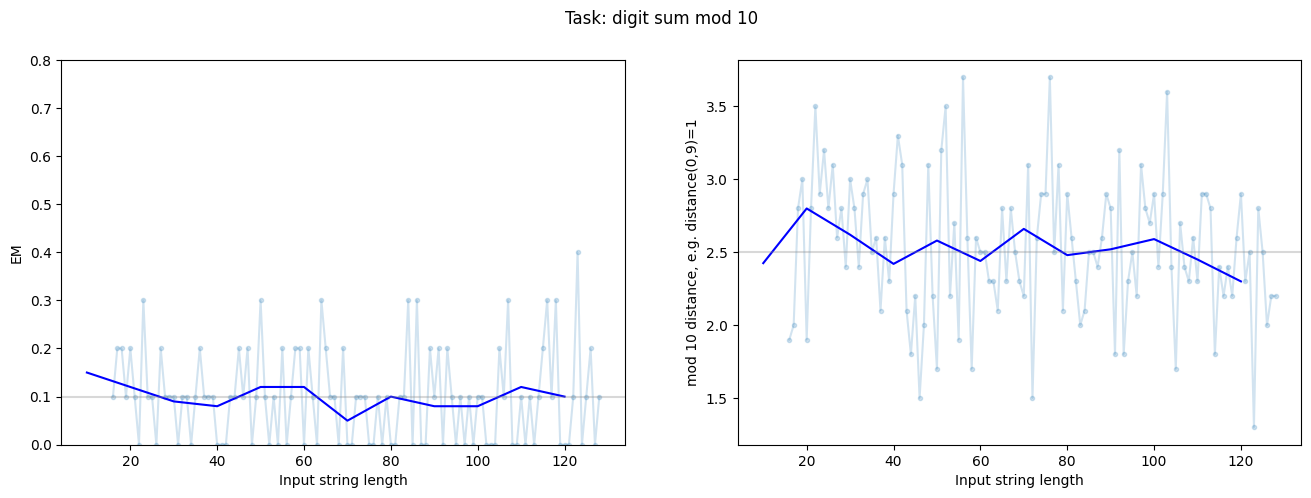

In [97]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_em.keys())
Y1 = [float(np.mean(input_len_to_em[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_em[k]) for k in input_len_to_em if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax1.plot(X1, Y1, "-", color='b')
ax1.set_ylim((0.0, 0.8))
ax1.axhline(y = 0.1, color="grey", alpha=0.3)
ax1.set_ylabel("EM")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_acc.keys())
Y2 = [float(np.mean(input_len_to_acc[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("mod 10 distance, e.g. distance(0,9)=1")
ax2.set_xlabel("Input string length")
ax2.axhline(y = 2.5, color="grey", alpha=0.3)

fig.suptitle("Task: digit sum mod 10")
plt.show()

In [106]:
dir = "../data/output_decoder_LM/chatgpt/regular/copy/"
input_len_to_acc = defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = re.findall(r'([0-9]+)', output)[0]
            input_len_to_acc[len(input)].append(lcs(gth, output) / len(gth))


100%|██████████| 241/241 [00:01<00:00, 186.40it/s]


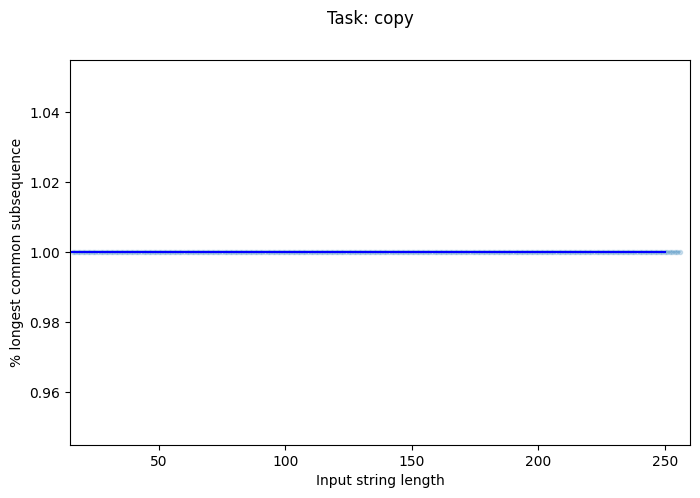

In [107]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
X1 = sorted(input_len_to_acc.keys())
Y1 = [float(np.mean(input_len_to_acc[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 26)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 26)
]
ax1.plot(X1, Y1, "-", color='b')
ax1.set_xlim((15, 260))
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")
fig.suptitle("Task: copy")
plt.show()

In [117]:
dir = "../data/output_decoder_LM/chatgpt/regular/reverse/"
input_len_to_acc, input_len_to_LD = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = "".join([c for c in output if '0'<=c<='9'])
            #output = re.findall(r'([0-9]+)', output)[0]
            input_len_to_acc[len(input)].append(lcs(gth, output) / len(gth))
            input_len_to_LD[len(input)].append(LD(gth, output) / len(gth))
print(len(input_len_to_acc[16]))


  0%|          | 0/7000 [00:00<?, ?it/s]

 64%|██████▍   | 2760/4300 [00:14<00:10, 150.39it/s]

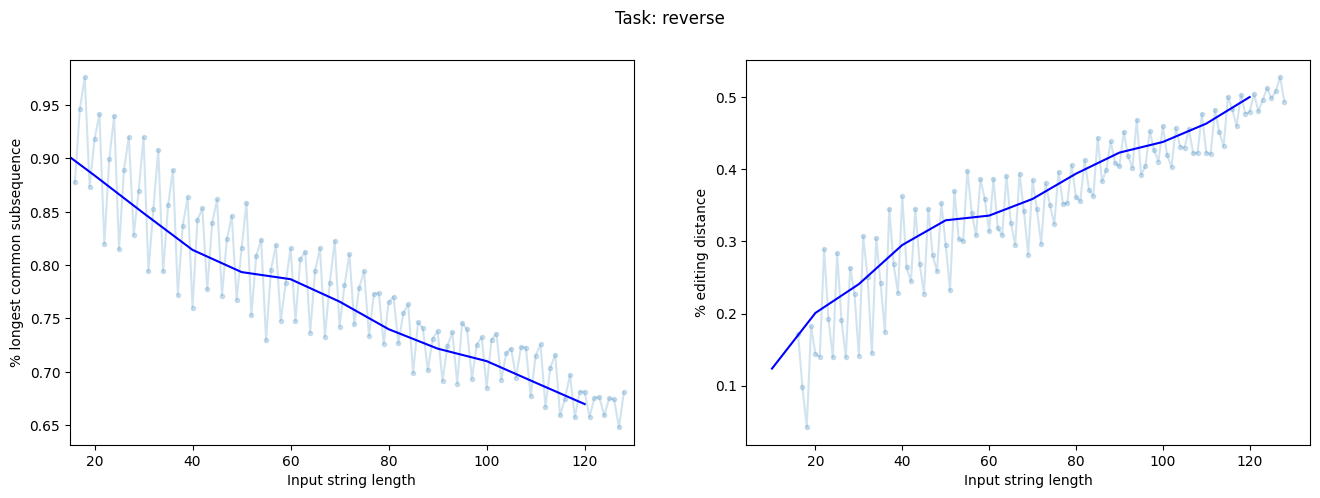

In [118]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_acc.keys())
Y1 = [float(np.mean(input_len_to_acc[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
"""
X1 = [x*3 for x in range(5, 43)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*3<k<=(1+x)*3]
        ))
        for x in range(5, 43)
]
"""
ax1.plot(X1, Y1, "-", color='b')
ax1.set_xlim((15, 130))
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_LD.keys())
Y2 = [float(np.mean(input_len_to_LD[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_LD[k]) for k in input_len_to_LD if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("% editing distance")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: reverse")
plt.show()

In [119]:
dir = "../data/output_decoder_LM/chatgpt/regular/sort/"
input_len_to_acc, input_len_to_LD = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = "".join([c for c in output if '0'<=c<='9'])
            #output = re.findall(r'([0-9]+)', output)[0]
            input_len_to_acc[len(input)].append(lcs(gth, output) / len(gth))
            input_len_to_LD[len(input)].append(LD(gth, output) / len(gth))
print(len(input_len_to_acc[16]))


100%|██████████| 800/800 [00:01<00:00, 450.77it/s] 

10


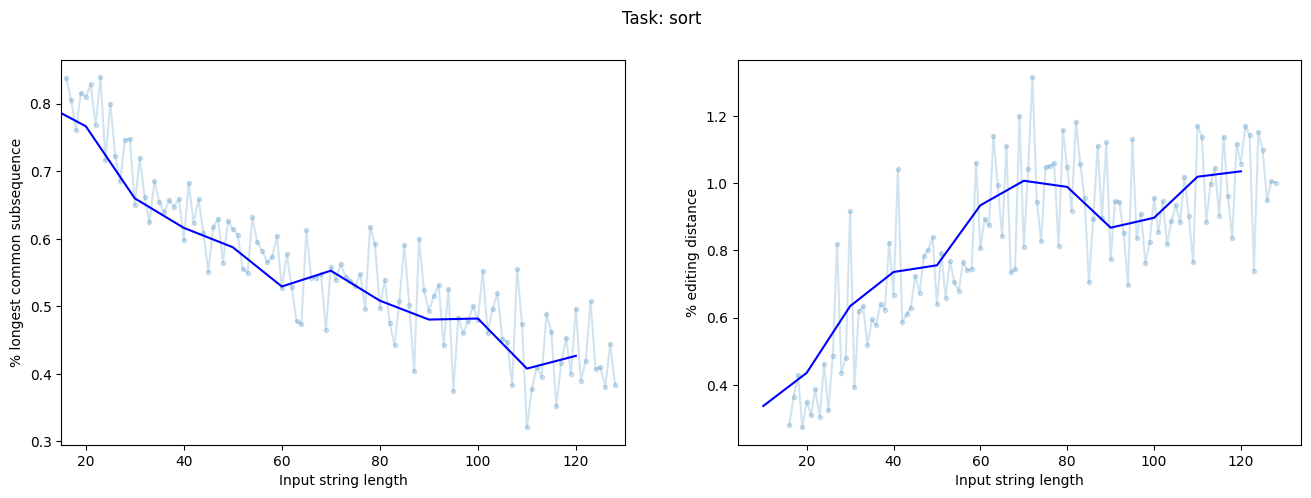

In [120]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_acc.keys())
Y1 = [float(np.mean(input_len_to_acc[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]

ax1.plot(X1, Y1, "-", color='b')
ax1.set_xlim((15, 130))
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_LD.keys())
Y2 = [float(np.mean(input_len_to_LD[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_LD[k]) for k in input_len_to_LD if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("% editing distance")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: sort")
plt.show()

In [144]:
dir = "../data/output_decoder_LM/chatgpt/regular/sum/"
input_len_to_error, input_len_to_mod10em, input_len_to_error_baseline = defaultdict(list), defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = int(re.findall(r'is ([0-9]+)', output)[0])
            input_len_to_error[len(input)].append(np.abs(int(gth) - output))
            input_len_to_error_baseline[len(input)].append(np.abs(5*len(input) - int(gth)))
            input_len_to_mod10em[len(input)].append(int(int(gth)%10 == output%10))


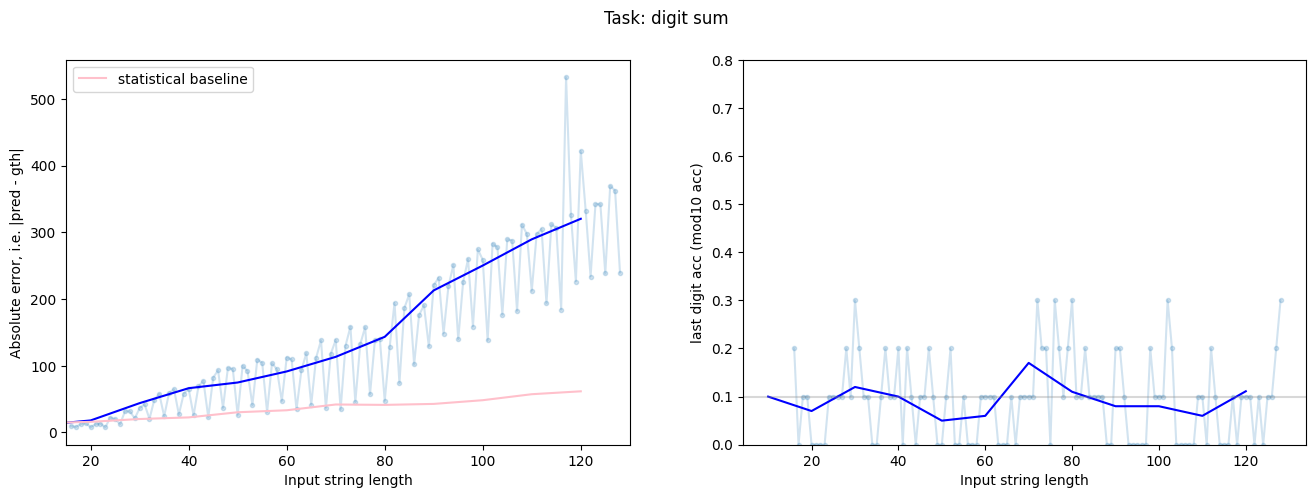

In [145]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_error.keys())
Y1 = [float(np.mean(input_len_to_error[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_error[k]) for k in input_len_to_error if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax1.plot(X1, Y1, "-", color='b')

X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_error_baseline[k]) for k in input_len_to_error_baseline if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax1.plot(X1, Y1, "-", color='pink', label="statistical baseline")

ax1.set_xlim((15, 130))
ax1.set_ylabel("Absolute error, i.e. |pred - gth|")
ax1.set_xlabel("Input string length")
ax1.legend()

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_mod10em.keys())
Y2 = [float(np.mean(input_len_to_mod10em[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_mod10em[k]) for k in input_len_to_mod10em if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.set_ylim((0, 0.8))
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("last digit acc (mod10 acc)")
ax2.set_xlabel("Input string length")
ax2.axhline(y = 0.1, color="grey", alpha=0.3)
fig.suptitle("Task: digit sum")
plt.show()

In [130]:
dir = "../data/output_decoder_LM/chatgpt/regular/add/"
input_len_to_acc, input_len_to_LD = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            inputs = input.split(" + ")
            try:
                if "e" in output:
                    output = str(int(float(output)))
                elif " = " in output:
                    output = re.findall(r'= ([0-9]+)', output)[0]
                elif "," in output:
                    output = output.replace(",", "")
                    output = re.findall(r'([0-9]+)', output)[0]
                else:
                    output = re.findall(r'([0-9]+)', output)[0]
            except:
                print(output)
                raise
            input_len_to_acc[len(inputs[0])].append(lcs(gth, output) / len(gth))
            input_len_to_LD[len(inputs[0])].append(LD(gth, output) / len(gth))
print(len(input_len_to_acc[16]))


100%|██████████| 1130/1130 [00:03<00:00, 299.59it/s]

10


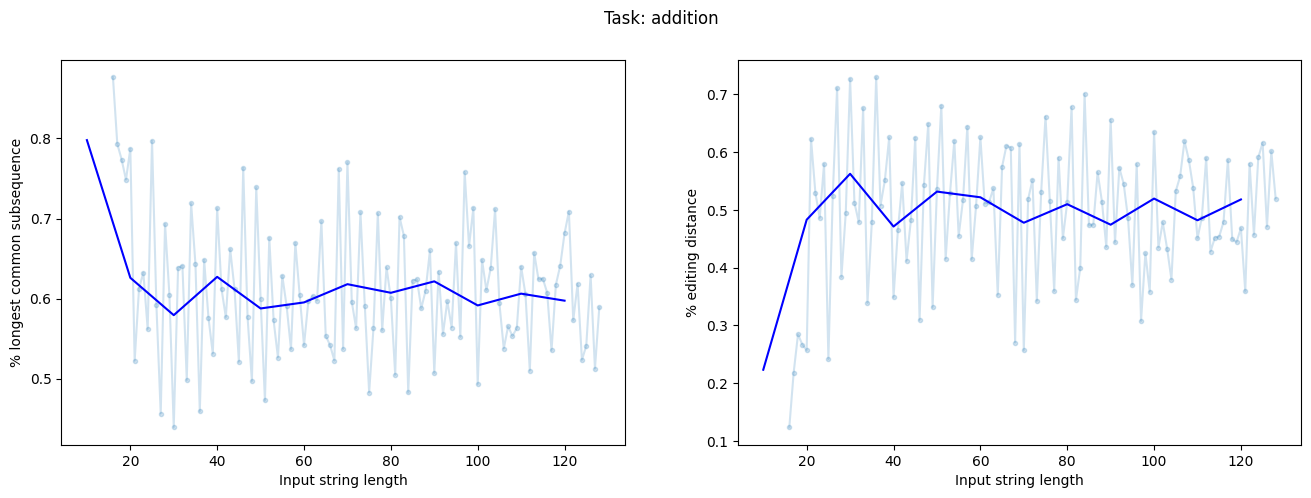

In [131]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_acc.keys())
Y1 = [float(np.mean(input_len_to_acc[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]

ax1.plot(X1, Y1, "-", color='b')
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_LD.keys())
Y2 = [float(np.mean(input_len_to_LD[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_LD[k]) for k in input_len_to_LD if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("% editing distance")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: addition")
plt.show()

In [137]:
dir = "../data/output_decoder_LM/chatgpt/regular/mult/"
input_len_to_acc, input_len_to_LD = defaultdict(list), defaultdict(list)
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            inputs = input.split(" * ")
            try:
                if " equals " in output:
                    output = re.findall(r' equals (.*)', output)[0]
                elif " is " in output: 
                    output = re.findall(r' is (.*)', output)[0]
                elif " = " in output:
                    output = re.findall(r'= ([0-9]+)', output)[0]
                if output[-1] == ".": output = output[:-1]
                if "e+" in output:
                    output = str(int(float(output)))
                elif "," in output:
                    output = output.replace(",", "")
                    output = re.findall(r'([0-9]+)', output)[0]
                else:
                    output = re.findall(r'([0-9]+)', output)[0]
            except:
                print(output)
                raise
            input_len_to_acc[len(inputs[0])].append(lcs(gth, output) / len(gth))
            input_len_to_LD[len(inputs[0])].append(LD(gth, output) / len(gth))


  0%|          | 0/904 [00:00<?, ?it/s]

100%|██████████| 904/904 [00:03<00:00, 230.49it/s] 


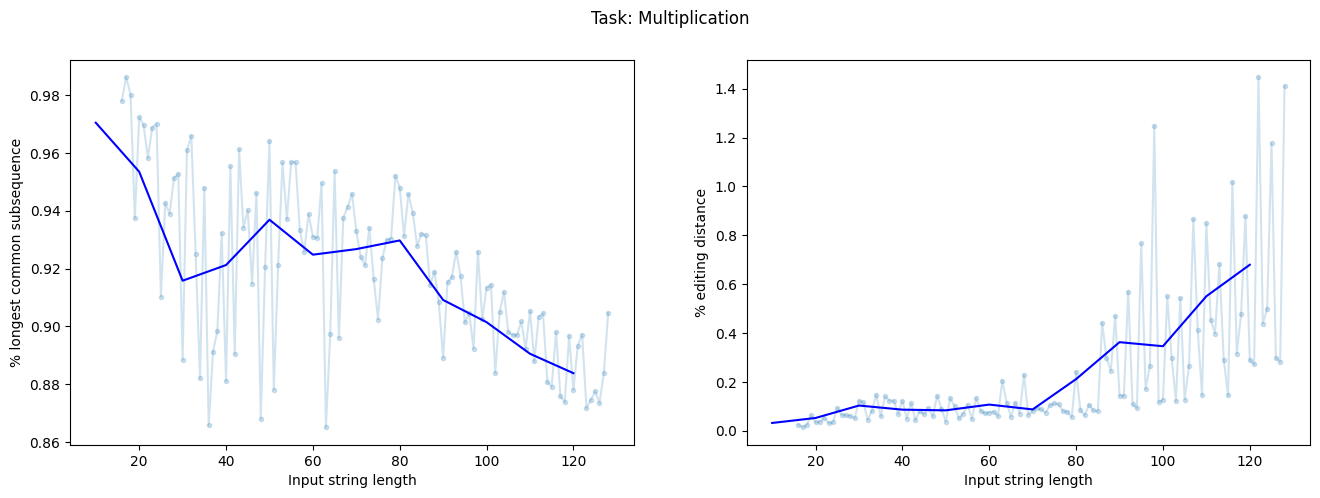

In [138]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
X1 = sorted(input_len_to_acc.keys())
Y1 = [float(np.mean(input_len_to_acc[x])) for x in X1]
ax1.plot(X1, Y1, ".-", alpha=0.2)
X1 = [x*10 for x in range(1, 13)]
Y1 = [
        float(np.mean(
            [np.mean(input_len_to_acc[k]) for k in input_len_to_acc if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax1.plot(X1, Y1, "-", color='b')
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
X2 = sorted(input_len_to_LD.keys())
Y2 = [float(np.mean(input_len_to_LD[x])) for x in X2]
ax2.plot(X2, Y2, ".-", alpha=0.2)
X2 = [x*10 for x in range(1, 13)]
Y2 = [
        float(np.mean(
            [np.mean(input_len_to_LD[k]) for k in input_len_to_LD if x*10<=k<(1+x)*10]
        ))
        for x in range(1, 13)
]
ax2.plot(X2, Y2, "-", color='b')
ax2.set_ylabel("% editing distance")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: Multiplication")
plt.show()

In [ ]:
# group by multipliers
dir = "../data/output_decoder_LM/chatgpt/regular/mult/"
input_len_to_acc, input_len_to_LD = defaultdict(lambda: defaultdict(list)), defaultdict(lambda: defaultdict(list))
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()[1:]
        for line in tqdm(lines):
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            inputs = input.split(" * ")
            try:
                if " equals " in output:
                    output = re.findall(r' equals (.*)', output)[0]
                elif " is " in output: 
                    output = re.findall(r' is (.*)', output)[0]
                elif " = " in output:
                    output = re.findall(r'= ([0-9]+)', output)[0]
                if output[-1] == ".": output = output[:-1]
                if "e+" in output:
                    output = str(int(float(output)))
                elif "," in output:
                    output = output.replace(",", "")
                    output = re.findall(r'([0-9]+)', output)[0]
                else:
                    output = re.findall(r'([0-9]+)', output)[0]
            except:
                print(output)
                raise
            input_len_to_acc[inputs[1]][len(inputs[0])].append(lcs(gth, output) / len(gth))
            input_len_to_LD[inputs[1]][len(inputs[0])].append(LD(gth, output) / len(gth))

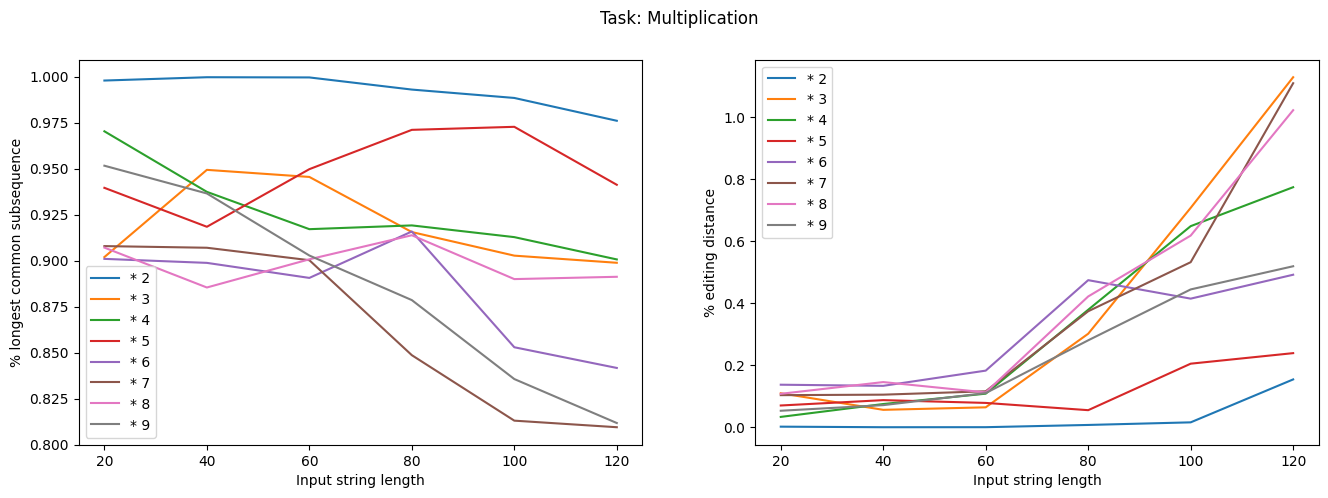

In [142]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
for multiplier in input_len_to_acc:
    d = input_len_to_acc[multiplier]
    X1 = [x*20 for x in range(1, 7)]
    Y1 = [
            float(np.mean(
                [np.mean(d[k]) for k in d if x*20<=k<(1+x)*20]
            ))
            for x in range(1, 7)
    ]

    ax1.plot(X1, Y1, "-", label=f"* {multiplier}")
ax1.legend()
ax1.set_ylabel("% longest common subsequence")
ax1.set_xlabel("Input string length")

ax2 = fig.add_subplot(122)
for multiplier in input_len_to_acc:
    d = input_len_to_LD[multiplier]
    X2 = [x*20 for x in range(1, 7)]
    Y2 = [
            float(np.mean(
                [np.mean(d[k]) for k in d if x*20<=k<(1+x)*20]
            ))
            for x in range(1, 7)
    ]

    ax2.plot(X2, Y2, "-", label=f"* {multiplier}")
ax2.legend()
ax2.set_ylabel("% editing distance")
ax2.set_xlabel("Input string length")

fig.suptitle("Task: Multiplication")
plt.show()